# Real-world Data Wrangling

## Nhóm 3

---

## 0. User-defined functions

---
##### Tên: Phạm Quốc Phú

In [446]:
def check_dataset_info(df):
    print("Thông tin cơ bản của DataFrame:")
    print(df.info())

    print("\nCác cột của DataFrame:")
    print(df.columns)
    
    print("\nKích thước của DataFrame (số hàng, số cột):")
    print(df.shape)
    
    print("\nThống kê mô tả của DataFrame:")
    print(df.describe(include='all'))
    
    print("\nSố lượng giá trị null trong mỗi cột:")
    print(df.isnull().sum())
    
    print("\nSố lượng giá trị duy nhất trong mỗi cột:")
    print(df.nunique())

## 1. Gather data

### **1.1.** Problem Statement

This project aims to practice my skills of data wrangling using real-world datasets.

Your statements here

In this dataset, I would like to answer the following research questions:

---
##### Tên : Trịnh Đàm Huy

Câu hỏi 1: 

Câu hỏi 2:



---
##### Tên : Phạm Quốc Phú

Câu hỏi 3: Trong số các trò chơi có sẵn cho Steam Deck, tỷ lệ trò chơi có đánh giá tích cực là bao nhiêu?

Câu hỏi 4: Nền tảng nào có game có giá gốc (price_original) cao nhất?



---
##### Tên : Phạm Hoàng Phúc

Câu hỏi 5: Mức độ tăng trưởng của các tựa game indie trong 10 năm gần đây như nào?

Câu hỏi 6: Trong năm 2022 thể loại game nào được phát triển nhiều nhất



### **1.2.** Gather at least two datasets using two different data gathering methods

---
##### Tên: Trịnh Đàm Huy

In [447]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt 

In [448]:
# read dataset games_info.csv
df_info = pd.read_csv('datasets/games_info.csv')
df_info

,app_id,rating,positive_ratio,user_reviews,price_final,price_original,discount
0,13500,Very Positive,84.0,2199.0,9.99,9.99,0.0
1,22364,Positive,85.0,21.0,2.99,2.99,0.0
2,113020,Very Positive,92.0,3722.0,14.99,14.99,0.0
3,226560,Mixed,61.0,873.0,14.99,14.99,0.0
4,249050,Very Positive,88.0,8784.0,11.99,11.99,0.0
...,...,...,...,...,...,...,...
50867,2296380,Very Positive,96.0,101.0,22.00,0.00,0.0
50868,1272080,Mostly Negative,38.0,29458.0,40.00,0.00,0.0
50869,1402110,Very Positive,89.0,1128.0,30.00,0.00,0.0
50870,2272250,Very Positive,95.0,82.0,17.00,0.00,0.0


In [449]:
# read dataset games_platforms.csv
df_platforms = pd.read_csv('datasets/games_platforms.csv')
df_platforms

,app_id,title,date_release,win,mac,linux,steam_deck
0,13500,Prince of Persia: Warrior Within™,11/21/2008,True,False,False,True
1,22364,BRINK: Agents of Change,8/3/2011,True,False,False,True
2,113020,Monaco: What's Yours Is Mine,4/24/2013,True,True,True,True
3,226560,Escape Dead Island,11/18/2014,True,False,False,True
4,249050,Dungeon of the ENDLESS™,10/27/2014,True,True,False,True
...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,9/28/2023,True,False,False,True
50868,1272080,PAYDAY 3,9/21/2023,True,False,False,True
50869,1402110,Eternights,9/11/2023,True,False,False,True
50870,2272250,Forgive Me Father 2,10/19/2023,True,False,False,True


In [450]:
# read dataset games_categories.csv
df_categories = pd.read_csv('datasets/games_categories.csv')
df_categories

,app_id,genres,player_support,indie
0,13500,Action,Singleplayer,False
1,22364,Action,Singleplayer,False
2,113020,Action,Multiplayer,True
3,226560,Action,Multiplayer,False
4,249050,Adventure,Singleplayer,True
...,...,...,...,...
50867,2296380,NaN,Singleplayer,False
50868,1272080,NaN,Singleplayer,False
50869,1402110,NaN,Singleplayer,False
50870,2272250,Action,Singleplayer,False


## 2. Assess data


I will assess the data both visually and programmatically to identify any data quality(content) issues and tidiness(structual) issues.

---
##### Tên: Phạm Quốc Phú

### Issue 1: Datasets games_info - Cột Rating, positive_ratio, user_reviews, price_final, price_original và discount xuất hiện giá trị null, kiểu dữ liệu cột positive_ratio, user_reviews, discount không phù hợp

In [451]:
# check info dataset games_info
check_dataset_info(df_info)

Thông tin cơ bản của DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   rating          50867 non-null  object 
 2   positive_ratio  50868 non-null  float64
 3   user_reviews    50860 non-null  float64
 4   price_final     50831 non-null  float64
 5   price_original  50840 non-null  float64
 6   discount        50864 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB
None

Các cột của DataFrame:
Index(['app_id', 'rating', 'positive_ratio', 'user_reviews', 'price_final',
       'price_original', 'discount'],
      dtype='object')

Kích thước của DataFrame (số hàng, số cột):
(50872, 7)

Thống kê mô tả của DataFrame:
              app_id    rating  positive_ratio  user_reviews   price_final  \
count   5.087200e+04     50867    50868.000000  5.086000e+04  5

#### Observations:

- Đổi kiểu dữ liệu positive_ratio, user_reviews, discount sang kiểu int16
- Ở cột rating thay thế giá trị null thành giá trị xuất hiện nhiều nhất
- Ở các cột positive_ratio, user_reviews, price_final, price_original và discount thay thế bằng giá trị trung bình

##### Tên : Trịnh Đàm Huy

---
### Issue 2: 
 - Kiểu dữ liệu của các cột date_release, win, mac, linux, steam_deck chưa đúng.
 - Còn giá trị null ở 5 cột nêu trên.

In [452]:
# check info dataset games_platforms
check_dataset_info(df_platforms)

Thông tin cơ bản của DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   app_id        50872 non-null  int64 
 1   title         50872 non-null  object
 2   date_release  50861 non-null  object
 3   win           50832 non-null  object
 4   mac           50821 non-null  object
 5   linux         50848 non-null  object
 6   steam_deck    50860 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB
None

Các cột của DataFrame:
Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'steam_deck'], dtype='object')

Kích thước của DataFrame (số hàng, số cột):
(50872, 7)

Thống kê mô tả của DataFrame:
              app_id  title date_release    win    mac  linux steam_deck
count   5.087200e+04  50872        50861  50832  50821  50848      50860
unique           NaN  50751         4292      2      2      2          2
t

In [453]:
# show null values in date_release
df_platforms[df_platforms['date_release'].isnull()]

,app_id,title,date_release,win,mac,linux,steam_deck
31,462280,Offworld Trading Company - Soundtrack DLC,NaN,True,True,False,True
14232,1241287,Monster Hunter World: Iceborne - MHW:I Room De...,NaN,True,False,False,True
14235,1358530,Saint Kotar,NaN,True,True,True,True
14237,1383280,Josh Journey: Darkness Totems,NaN,True,False,False,True
44461,367030,Lootfest,NaN,True,False,False,True
44678,1585830,Quickly Quackley!,NaN,True,False,False,True
44687,530330,Blameless,NaN,True,True,False,True
44693,1375070,FurBall,NaN,True,False,False,True
44703,820790,FEAST: Book One «Family Ties»,NaN,True,False,False,True
44708,1937530,Dying Light 2 - Deluxe Upgrade,NaN,True,False,False,True


In [454]:
# show first 5 rows
df_platforms.head(5)

,app_id,title,date_release,win,mac,linux,steam_deck
0,13500,Prince of Persia: Warrior Within™,11/21/2008,True,False,False,True
1,22364,BRINK: Agents of Change,8/3/2011,True,False,False,True
2,113020,Monaco: What's Yours Is Mine,4/24/2013,True,True,True,True
3,226560,Escape Dead Island,11/18/2014,True,False,False,True
4,249050,Dungeon of the ENDLESS™,10/27/2014,True,True,False,True


#### Observations:

- Chuyển cột date_release sang kiểu dữ liệu datetime, các cột win, mac, linux, steam_deck sang kiểu dữ liệu bool
- Cho các giá trị null ở cột date_release thành ngày trung bình
- Cho các giá trị null ở 4 cột win, mac, linux, steam_deck thành các giá trị xuất hiện nhiều nhất

---
##### Tên: Phạm Hoàng Phúc

### Issue 3: Dataset game_categories: Cột genres có chứa các giá trị null

In [455]:
# show first 5 rows
df_categories.head(5)

,app_id,genres,player_support,indie
0,13500,Action,Singleplayer,False
1,22364,Action,Singleplayer,False
2,113020,Action,Multiplayer,True
3,226560,Action,Multiplayer,False
4,249050,Adventure,Singleplayer,True


In [456]:
# check info dataset games_categories
check_dataset_info(df_categories)

Thông tin cơ bản của DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   app_id          50872 non-null  int64 
 1   genres          44575 non-null  object
 2   player_support  50872 non-null  object
 3   indie           50872 non-null  bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 1.2+ MB
None

Các cột của DataFrame:
Index(['app_id', 'genres', 'player_support', 'indie'], dtype='object')

Kích thước của DataFrame (số hàng, số cột):
(50872, 4)

Thống kê mô tả của DataFrame:
              app_id  genres player_support  indie
count   5.087200e+04   44575          50872  50872
unique           NaN       6              2      2
top              NaN  Action   Singleplayer   True
freq             NaN   21897          44297  27957
mean    1.055224e+06     NaN            NaN    NaN
std     6.103249e+05     NaN            NaN 

#### Observations:

- Thay đổi các giá trị null trong cột genres thành 'Other'

## 3. Clean data

Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step.

Make copies of the datasets

In [457]:
# make copy of dataset games_info
df_info_copy = df_info.copy()

In [458]:
# make copy of dataset games_platforms
df_platforms_copy = df_platforms.copy()

In [459]:
# make copy of dataset games_categories
df_categories_copy = df_categories.copy()

---
##### Tên: Phạm Quốc Phú

### Issue 1: Datasets games_info - Cột Rating, positive_ratio, user_reviews, price_final, price_original và discount xuất hiện giá trị null, kiểu dữ liệu cột positive_ratio, user_reviews, discount không phù hợp

In [460]:
# In the rating column, replace the null value with the value that appears most often
df_info['rating'].fillna(df_info['rating'].mode()[0], inplace=True)

C:\Users\trinh\AppData\Local\Temp\ipykernel_18276\406404285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_info['rating'].fillna(df_info['rating'].mode()[0], inplace=True)


In [461]:
# Validate the cleaning was successful
df_info.isnull().sum()

app_id             0
rating             0
positive_ratio     4
user_reviews      12
price_final       41
price_original    32
discount           8
dtype: int64

In [462]:
# In positive_ratio, user_reviews, price_final, price_original and discount, replace null value with mean value
columns_to_fill = ['positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount']
df_info[columns_to_fill] = df_info[columns_to_fill].fillna(df_info[columns_to_fill].mean())

In [463]:
df_info.isnull().sum()

app_id            0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
dtype: int64

In [464]:
# Change data type of positive_ratio, user_reviews, discount from float64 to int16
df_info[['positive_ratio', 'user_reviews', 'discount']] = df_info[['positive_ratio', 'user_reviews', 'discount']].astype('int16')

In [465]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   rating          50872 non-null  object 
 2   positive_ratio  50872 non-null  int16  
 3   user_reviews    50872 non-null  int16  
 4   price_final     50872 non-null  float64
 5   price_original  50872 non-null  float64
 6   discount        50872 non-null  int16  
dtypes: float64(2), int16(3), int64(1), object(1)
memory usage: 1.8+ MB


##### Justification:
- Ở cột rating có kiểu dữ liệu là object nên chọn thay thế missing value bằng giá trị xuất hiện nhiều nhất
- Ở các cột positive_ratio, user_reviews, price_final, price_original và discount đều có kiểu dữ liệu số nên chọn thay thế missing value bằng giá trị trung bình
- Ở các cột positive_ratio, user_reviews và discount dữ liệu trong dataset đều nằm trong khả năng biểu diễn của kiểu dữ liệu int16 nên đổi từ kiểu float64 sang int16

---
##### Tên: Trịnh Đàm Huy

### Issue 2: 
 - Kiểu dữ liệu của các cột date_release, win, mac, linux, steam_deck chưa đúng.
 - Còn giá trị null ở 5 cột nêu trên.

In [466]:
# replace null values in win, mac, linux, steam_deck with most common value
df_platforms_copy.fillna({'win': 'true', 'mac': 'false', 'linux': 'false', 'steam_deck': 'true'}, inplace=True)

In [467]:
# fix data type of date_release
df_platforms_copy['date_release'] = pd.to_datetime(df_platforms_copy['date_release'])
# fix data type of win, mac, linux, steam_deck
df_platforms_copy[['win', 'mac', 'linux', 'steam_deck']] = df_platforms_copy[['win', 'mac', 'linux', 'steam_deck']].astype('bool')

In [468]:
# replace null values in date_release with mean value
df_platforms_copy.fillna({'date_release': df_platforms_copy['date_release'].mean()}, inplace=True)

In [469]:
# validate the cleaning was successful
check_dataset_info(df_platforms_copy)

Thông tin cơ bản của DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_id        50872 non-null  int64         
 1   title         50872 non-null  object        
 2   date_release  50872 non-null  datetime64[ns]
 3   win           50872 non-null  bool          
 4   mac           50872 non-null  bool          
 5   linux         50872 non-null  bool          
 6   steam_deck    50872 non-null  bool          
dtypes: bool(4), datetime64[ns](1), int64(1), object(1)
memory usage: 1.4+ MB
None

Các cột của DataFrame:
Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'steam_deck'], dtype='object')

Kích thước của DataFrame (số hàng, số cột):
(50872, 7)

Thống kê mô tả của DataFrame:
              app_id  title                   date_release    win    mac  \
count   5.087200e+04  50872                 

##### Justification:
 - Thay thế các dữ liệu null của các cột có kiểu dữ liệu bool trước khi chuyển kiểu dữ liệu của cột. Bởi vì sau khi thay đổi kiểu dữ liệu, các dữ liệu null sẽ tự động chuyển thành false
 - Sửa kiểu dữ liệu của date_release thành datetime
 - Sửa kiểu dữ liệu của các cột win, mac, linux, steam_deck thành bool
 - Thay thế các date_release bị null thành giá trị mean

---
##### Tên: Phạm Hoàng Phúc

### Issue 3: Dataset game_categories: Cột genres có chứa các giá trị null

In [470]:
# replace the null value in genres with 'Other' 
df_categories_copy.fillna({'genres': 'Other'}, inplace=True)

In [471]:
# Validate the cleaning was successful
df_categories_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   app_id          50872 non-null  int64 
 1   genres          50872 non-null  object
 2   player_support  50872 non-null  object
 3   indie           50872 non-null  bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 1.2+ MB


##### Justification:
- Cột genres thể hiện thể loại của các game nên sẽ thay các hàng null bằng 'Ohter'

## 4. Merge and Store data

---
##### Tên:

#### Merge dataset game_info and games_platforms

In [472]:
# merge dataset games_info and games_platforms on app_id
df_merge_1 = pd.merge(df_info_copy, df_platforms_copy, on='app_id')

---
##### Tên: 

#### Merge dataset game_info and games_categories

In [473]:
# merge dataset games_info and games_categories on app_id
df_merge_2 = pd.merge(df_merge_1, df_categories_copy, on='app_id')

---
##### Tên:

#### Saving data

In [474]:
# save dataset to csv
df_merge_2.to_csv('games.csv', index=False)

## 5. Visualizations and Communication

---
##### Tên:

#### Plot 1: 

In [475]:
# create plot here

#### Justifications:

- Liệt kê những nhận xét tại đây

#### Plot 2: 

In [476]:
# create plot here

#### Justifications:

- Liệt kê những nhận xét tại đây

---
##### Tên:

#### Plot 3: 

In [477]:
# create plot here

#### Justifications:

- Liệt kê những nhận xét tại đây

#### Plot 4: 

In [478]:
# create plot here

#### Justifications:

- Liệt kê những nhận xét tại đây

---
##### Tên: Phạm Hoàng Phúc

#### Plot 5: Mức độ phát triển của các tựa game indie kể từ năm 2010

In [479]:
# get app_id, date_release, indie from df_merge_2
df_indie = df_merge_2.loc[:, ['app_id', 'date_release', 'indie']]
df_indie['date_release'] = pd.to_datetime(df_indie['date_release'])
df_indie['year'] = df_indie['date_release'].dt.year
df_indie = df_indie[(df_indie['year'] >= 2010) & (df_indie['year'] < 2023)  & (df_indie['indie'] == True)]
df_indie = df_indie.drop(['date_release', 'indie'], axis=1)
df_indie['year'] = df_indie['year'].astype(int)
# sum game with year
df_indie = df_indie.groupby('year')['app_id'].count().reset_index(name='total_games')
df_indie

,year,total_games
0,2010,77
1,2011,120
2,2012,193
3,2013,312
4,2014,993
5,2015,1842
6,2016,2717
7,2017,3293
8,2018,3825
9,2019,3351


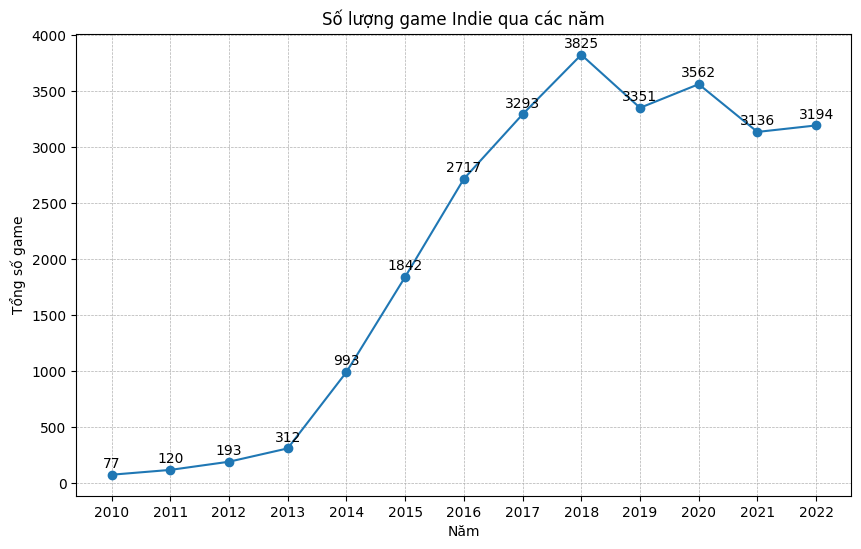

In [480]:
# plot the line chart 
plt.figure(figsize=(10, 6))
plt.plot(df_indie['year'], df_indie['total_games'], marker='o')

# set info plot
plt.title('Số lượng game Indie qua các năm')
plt.xlabel('Năm')
plt.ylabel('Tổng số game')

# set grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(df_indie['year'])

# set data
for i, txt in enumerate(df_indie['total_games']):
    plt.annotate(txt, (df_indie['year'][i], df_indie['total_games'][i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()


#### Justifications:

- Dựa vào biểu đồ trên ta có thể nhận thấy năm 2010 có số lượng game indie thấp nhất với 77 game.
- Từ năm 2013 tới năm 2018 thì số lượng game indie tăng trưởng nhanh chóng và đạt đỉnh điểm vào 2018 với 3825 game.

#### Plot 6: 

In [481]:
# create plot here

#### Justifications:

- Liệt kê những nhận xét tại đây